## Econometrics RM: MSE, Bias$^{2}$, and Variance of the ML-Estimator of the Standard Deviation
#### by Danial Syed

### 1) Initialization

In [1]:
rm(list=ls())

suppressMessages(library(ggplot2))
suppressMessages(library(repr))

#Paramter Setup
mu    <- 3
sigma <- 1.5 

### 2) Function to produce SD estimate 

In [2]:
sd_function <- function(n){

    set.seed(i)
    
    # Simulate a realization from the iid random sample
    X     <- rnorm(n, mu, sigma)
    
    s_n   <- sqrt(sum((X-mean(X))^2)/n)         # estimator 1
    s_u   <- sqrt(sum((X-mean(X))^2)/(n-1))     # estimator 2
    
    sd_estims <- cbind(s_n, s_u)
    return(sd_estims)
}


### 3) Bias/Variance/MSE Simulation

In [3]:
# Sample Sizes ranging from 2 to 30.
sample_size <- seq(2, 30, by = 2)
sim         <- length(sample_size)

# Number of iterations to perform over each sample size 
rep = 10000

# Creating matrices to store simulation results
sd_estimates <- matrix(NA, ncol = 2, nrow = rep)
Z_n          <- matrix(NA, ncol = sim, nrow = rep)
Z_dist       <- matrix(NA, ncol = sim, nrow = rep)
bias_matrix  <- matrix(NA, ncol = 2, nrow = sim)
var_matrix   <- matrix(NA, ncol = 2, nrow = sim)
mse_matrix   <- matrix(NA, ncol = 2, nrow = sim)
 
# for Loop gives realization of the SD FOR each iteration, FOR each increasing sample size.

for (j in 1:sim) {
    for (i in 1:rep) {
        sd_estimates[i,1] <- sd_function(sample_size[j])[1]  # Realization of sd estimate in the i'th iteration
        sd_estimates[i,2] <- sd_function(sample_size[j])[2]  
        
        Z_n[i,j]          <- (sample_size[j]-1)*(sd_function(sample_size[j])[1]^2)/(sigma^2)  # empirical distribution
        Z_dist[i,j]       <- (Z_n[i,j] - (sample_size[j] -1))/sqrt(2*(sample_size[j]-1))
    } 
      
    bias_matrix[j,1] <- (mean(sd_estimates[,1]) - sigma)^2                    # Realization of bias for j'th sample size
    bias_matrix[j,2] <- (mean(sd_estimates[,2]) - sigma)^2 
    
    var_matrix[j,1]  <- mean((sd_estimates[,1] - mean(sd_estimates[,1]))^2)   # Realization of variance for j'th sample size
    var_matrix[j,2]  <- mean((sd_estimates[,2] - mean(sd_estimates[,2]))^2)
    
    mse_matrix[j,1] <-  mean((sd_estimates[,1] - sigma)^2)                    # Realization of MSE for j'th sample size
    mse_matrix[j,2] <-  mean((sd_estimates[,2] - sigma)^2) 
}


### 4) Plotting the Results

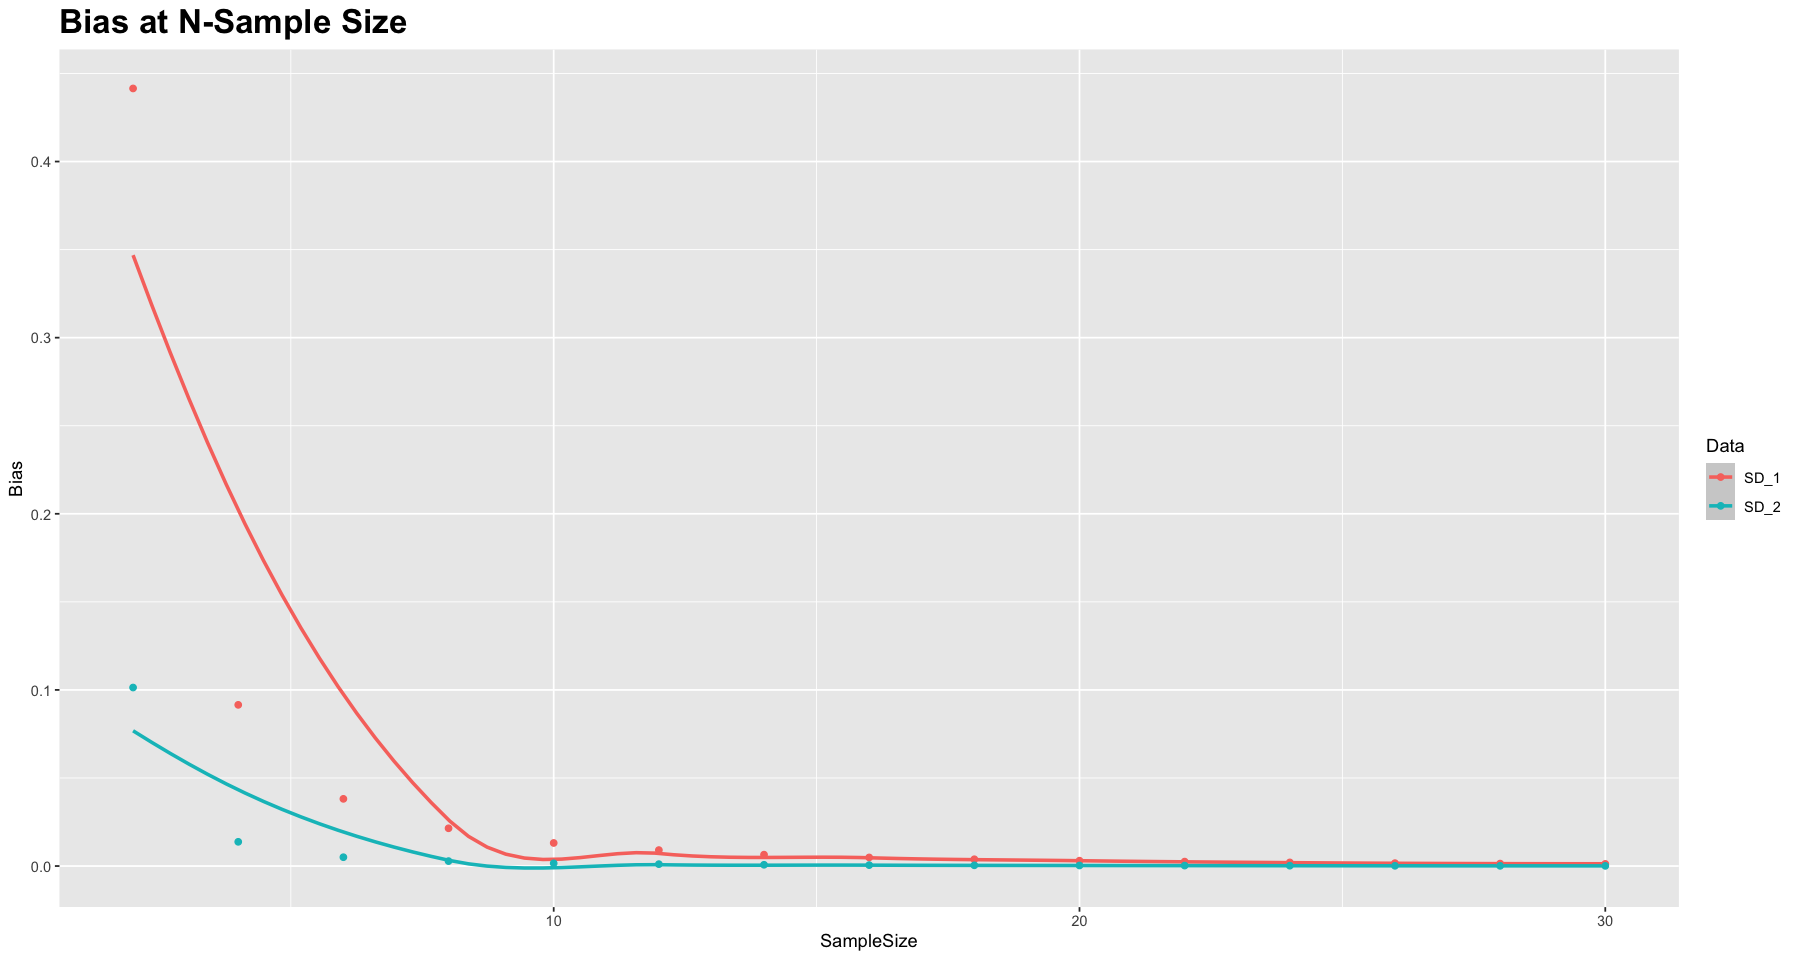

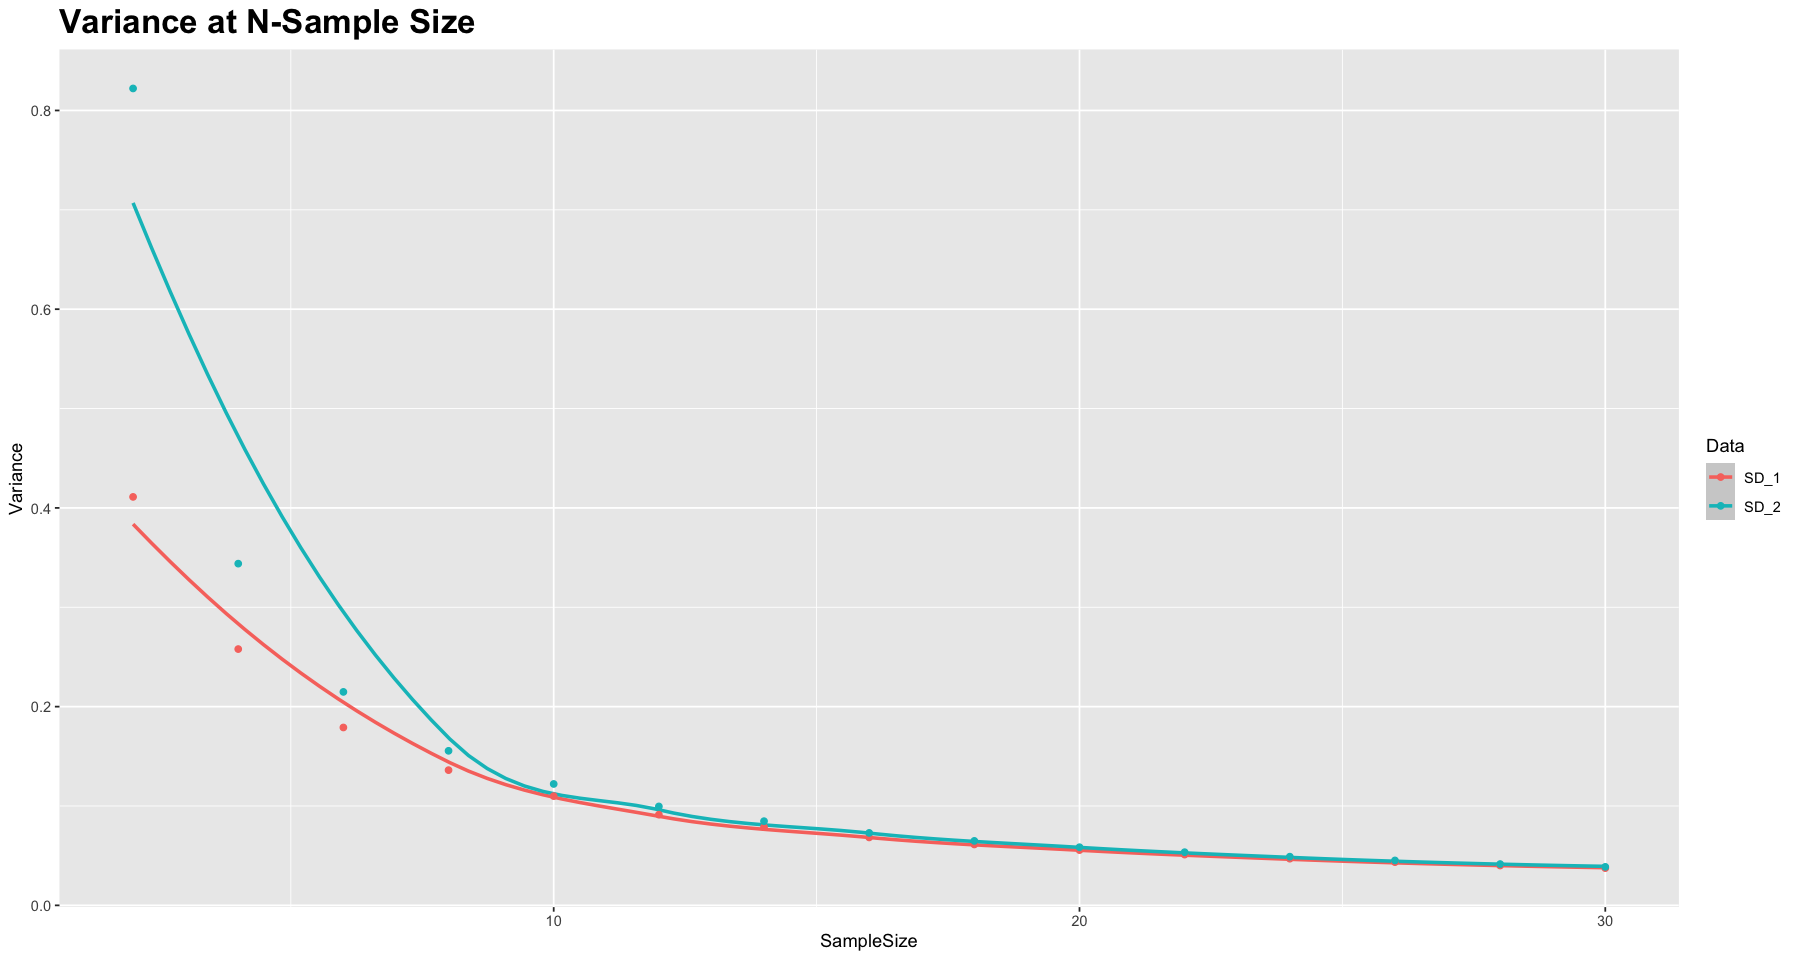

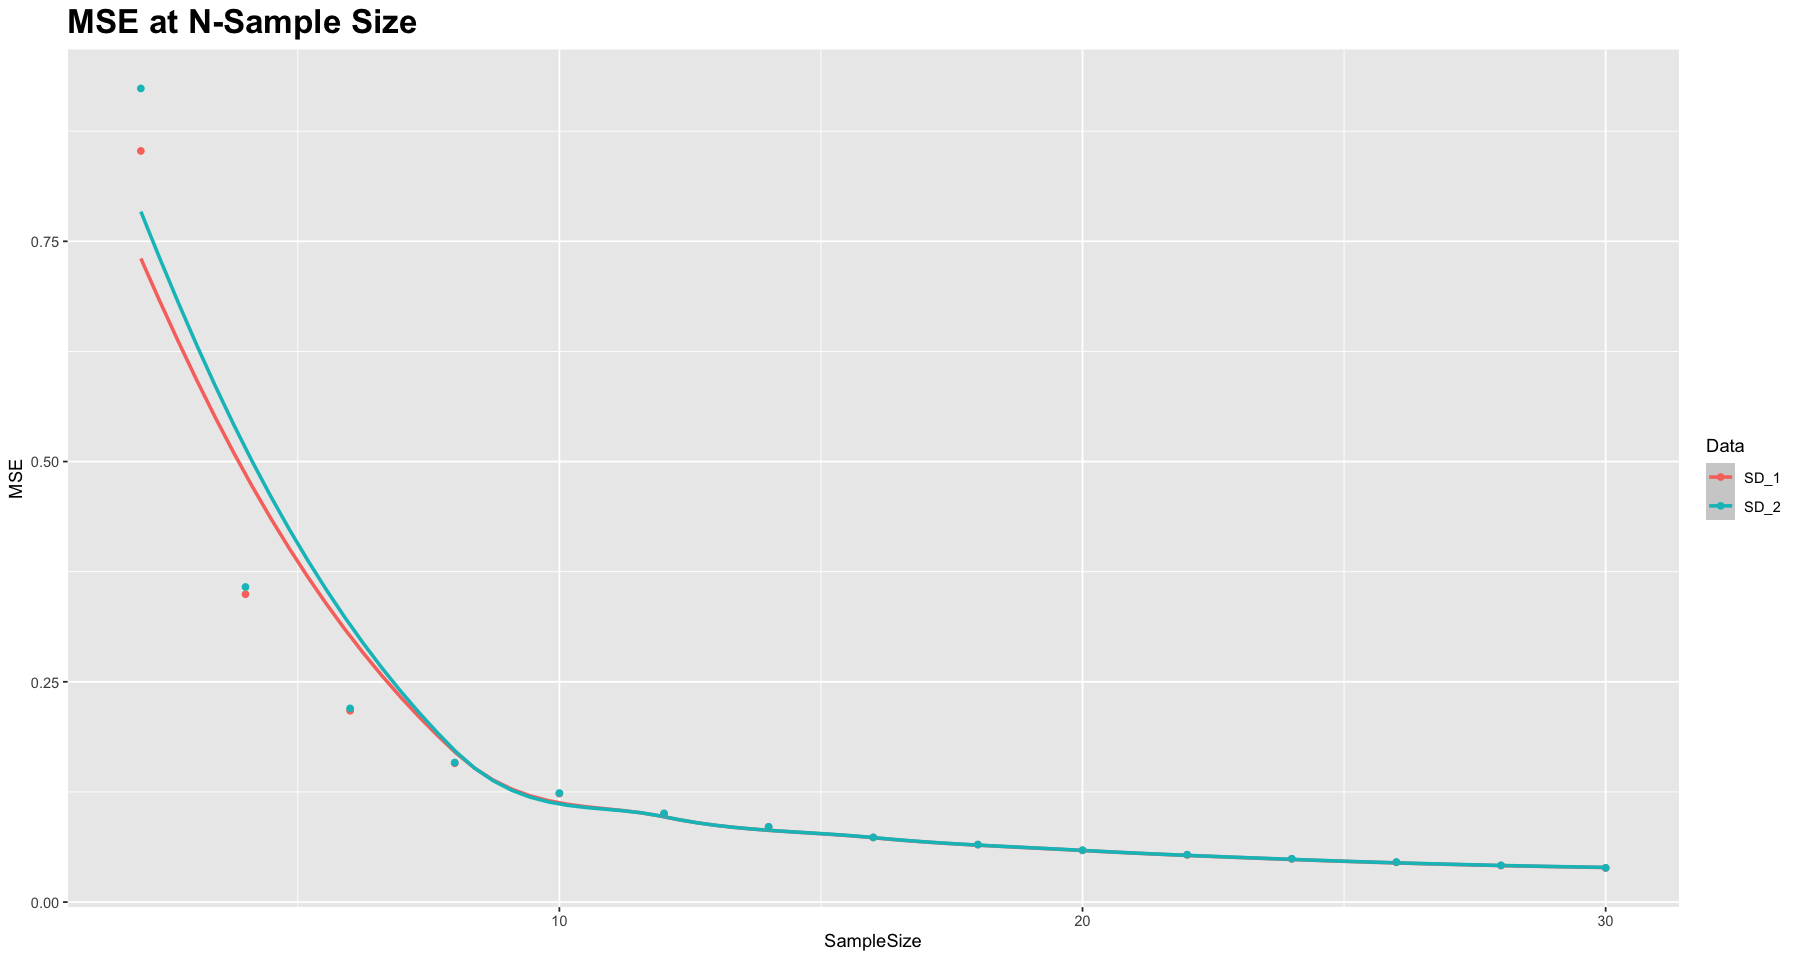

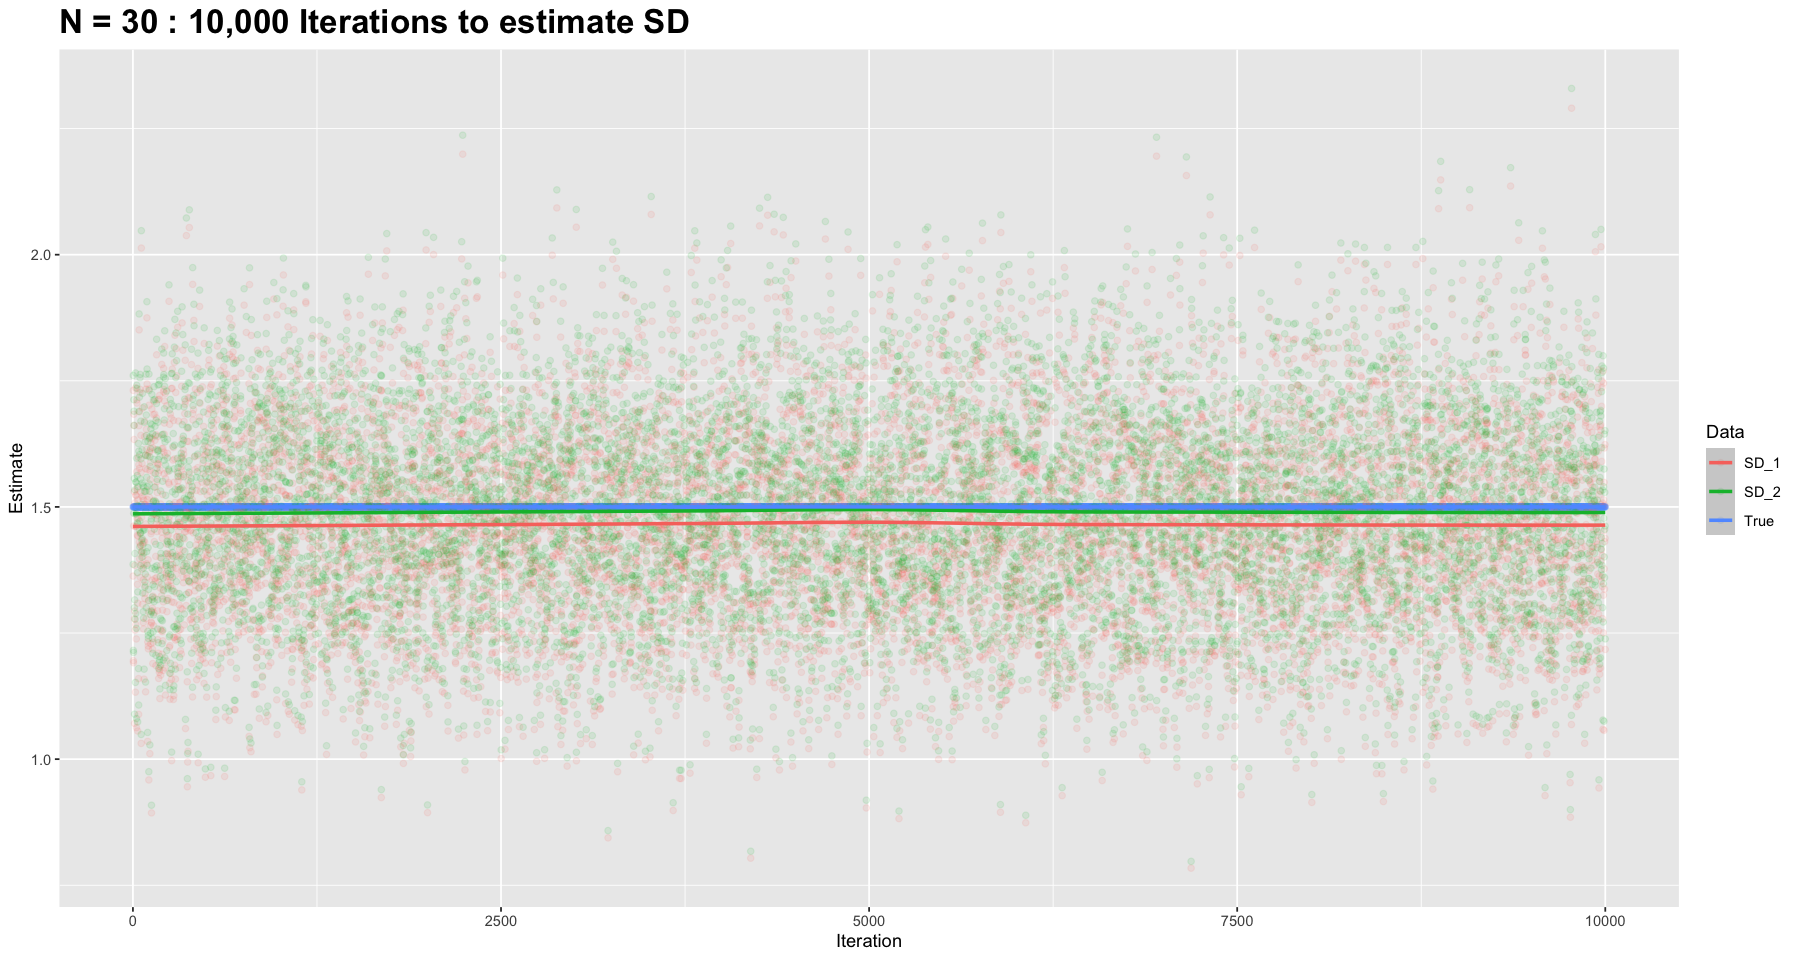

In [5]:
# All the result are organized in a trade-off matrix which will be used to plot graphs
df_tradeoff <- data.frame(c(rep("SD_1",sim), rep("SD_2",sim)),
    c(bias_matrix[,1],bias_matrix[,2]),
    c(var_matrix[,1],var_matrix[,2]),
    c(mse_matrix[,1],mse_matrix[,2]),
    rep(sample_size,2))
colnames(df_tradeoff)<-c("Data","Bias","Variance","MSE", "SampleSize")

df_estimates <- data.frame(c(rep("True",rep),rep("SD_1",rep), rep("SD_2",rep)),
    rep(1:rep,3),c(rep(sigma, rep),sd_estimates[,1],sd_estimates[,2]))
colnames(df_estimates)<-c("Data","Iteration","Estimate")

# Plot the Bias against Sample Sizes
ggplot(data=df_tradeoff, aes(x=SampleSize, y=Bias, group=Data, colour=Data)) +
    geom_smooth(method="loess", formula = y ~ x, se=TRUE, fullrange=FALSE, level = 0.01) +
    geom_point() + 
    #coord_cartesian(ylim=c(0.50,0.065), xlim=c(0.0005, 0.004)) +
    ggtitle("Bias at N-Sample Size") + theme(plot.title = 
    element_text(color="black", face="bold", size=20)) 
options(repr.plot.width=15, repr.plot.height=8)

# Plot the Variance against Sample Sizes
ggplot(data=df_tradeoff, aes(x=SampleSize, y=Variance, group=Data, colour=Data)) +
    geom_smooth(method="loess", se=TRUE, formula = y ~ x, fullrange=FALSE, level = 0.01) +
    geom_point() + 
    #coord_cartesian(ylim=c(0, 0.003), xlim=c(30, 300)) +
    ggtitle("Variance at N-Sample Size") + theme(plot.title = 
    element_text(color="black", face="bold", size=20)) 
options(repr.plot.width=15, repr.plot.height=8)

# Plot the MSE against Sample Sizes
ggplot(data=df_tradeoff, aes(x=SampleSize, y=MSE, group=Data, colour=Data)) +
    geom_smooth(method="loess", se=TRUE, formula = y ~ x, fullrange=FALSE, level = 0.01) +
    geom_point() + 
    #coord_cartesian(ylim=c(0, 0.003), xlim=c(30, 300)) +
    ggtitle("MSE at N-Sample Size") + theme(plot.title = 
    element_text(color="black", face="bold", size=20)) 
options(repr.plot.width=15, repr.plot.height=8)

# Plot the Estimates when N = 30
ggplot(data=df_estimates, aes(x=Iteration, y=Estimate, group=Data, colour=Data)) +
    geom_point(alpha = 1/10) +
    #coord_cartesian(ylim=c(0.01,0.3)) +
    #geom_line(stat = "smooth", method = lm, formula = y ~ x, color = "cyan", size = 1, alpha = 100) +
    geom_smooth(method="loess", se=TRUE, formula = y ~ x, fullrange=FALSE, level=0.01) +
    ggtitle("N = 30 : 10,000 Iterations to estimate SD") + theme(plot.title = 
    element_text(color="black", face="bold", size=20)) 
options(repr.plot.width=15, repr.plot.height=8)


### 5) Additional simulation to illustrate an aspect from estimation theory: Delta Method

In [46]:
lam <- 0.2

sample_size1  <- seq(5, 100, by = 5)
sim_s  <- length(sample_size1)
Z       <- matrix(NA, ncol=sim_s, nrow=rep) 
lam_hat <- rep(NA, sim_s)

for (j in 1:sim_s) {
    for (i in 1:rep) {
        
        set.seed(i)
        X      <- rexp(n = sample_size1[j], rate = lam)
        x_bar  <- mean(X)        
        Z[i,j] <-  (sample_size1[j]^0.5)*(1/x_bar - lam)
        
    }
    lam_hat[j] <- sd(Z[,j])
}

,Data,Estimates,SampleSize
,<chr>,<dbl>,<dbl>
21,Lambda_Estimate,0.3258354,5
22,Lambda_Estimate,0.2418170,10
23,Lambda_Estimate,0.2278563,15
24,Lambda_Estimate,0.2235636,20
25,Lambda_Estimate,0.2179096,25
26,Lambda_Estimate,0.2163868,30
27,Lambda_Estimate,0.2125204,35
28,Lambda_Estimate,0.2119384,40
29,Lambda_Estimate,0.2113998,45


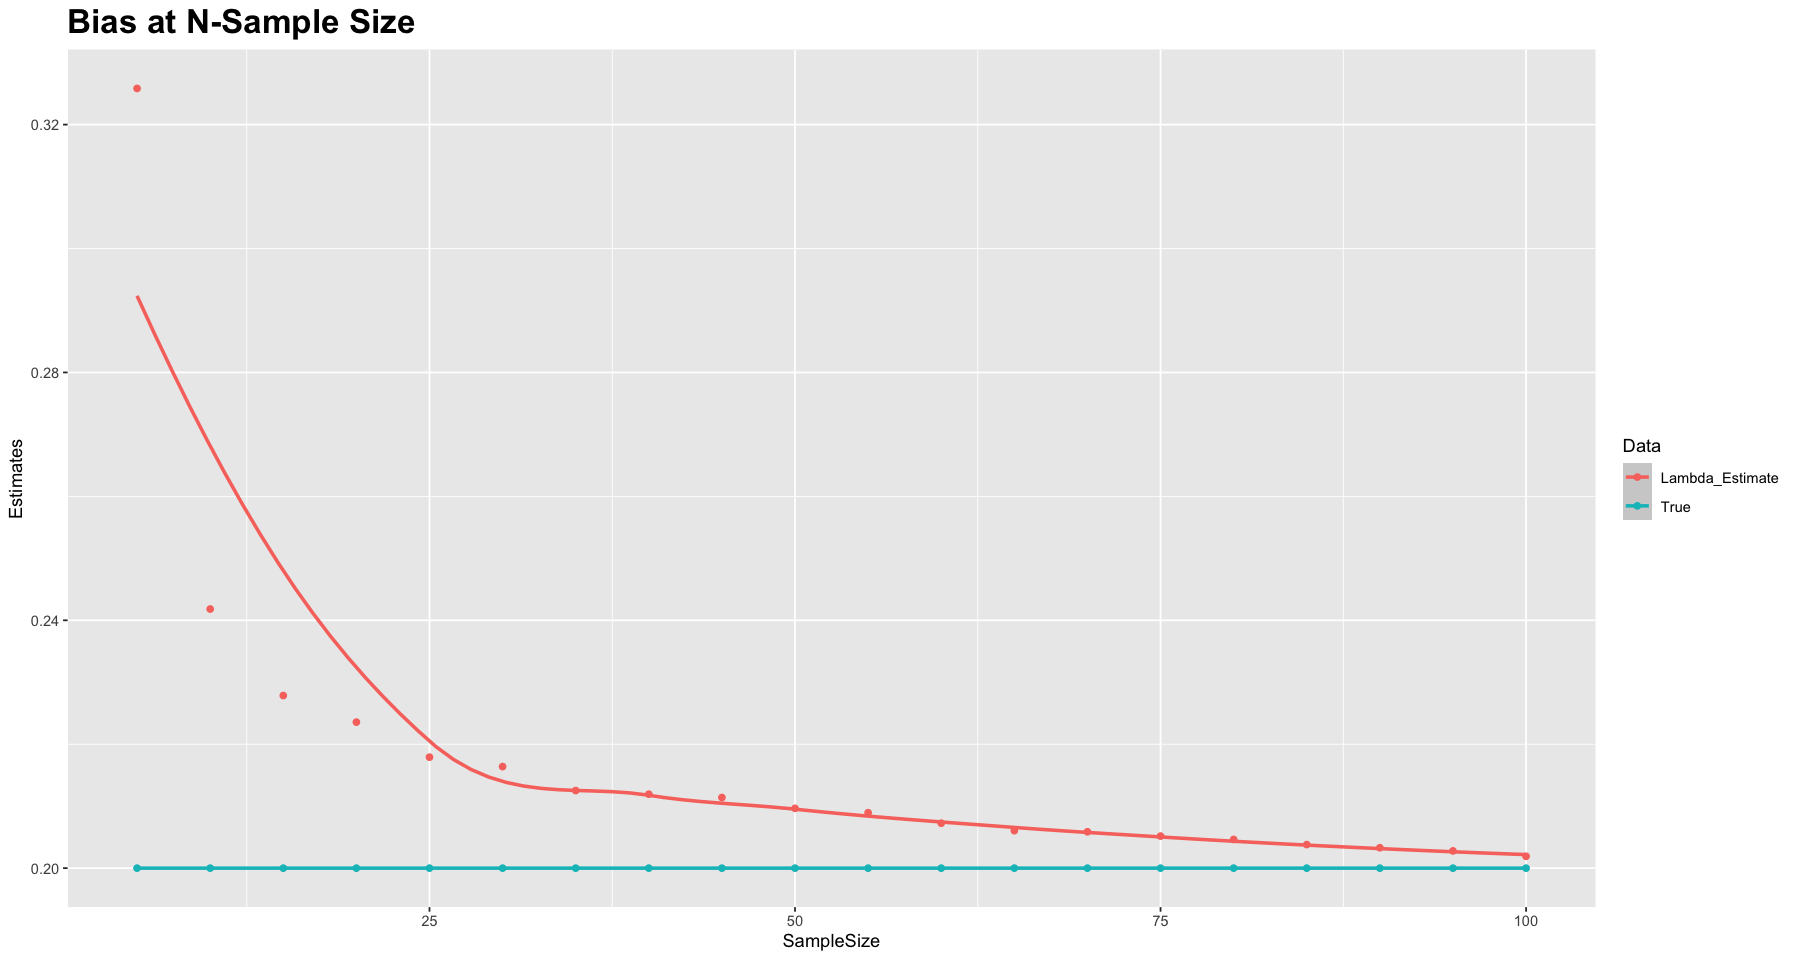

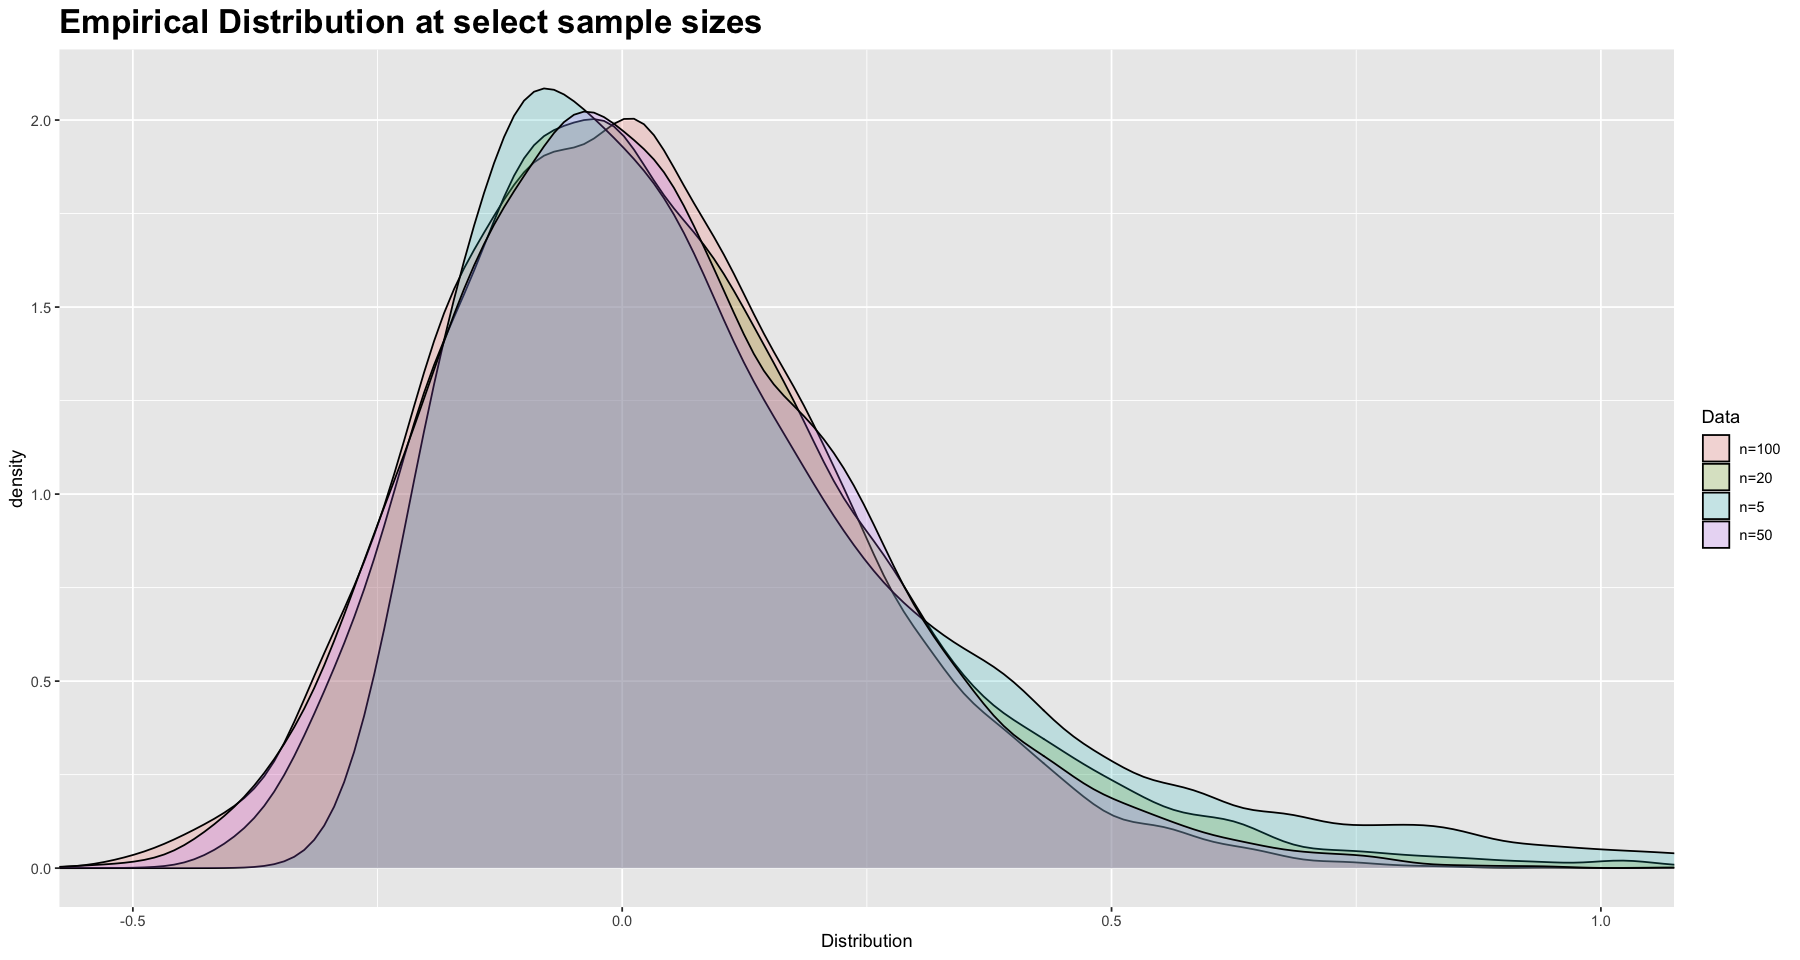

In [47]:
# All the result are organized in a matrix which will be used to plot graphs
df_delta <- data.frame(c(rep("True",sim_s), rep("Lambda_Estimate",sim_s)),
    c(rep(lam, sim_s), lam_hat),
    rep(sample_size1,1))
colnames(df_delta)<-c("Data", "Estimates", "SampleSize")

df_dist1 <- data.frame(c(rep("n=5",rep),rep("n=20",rep), rep("n=50",rep), rep("n=100",rep)),
    c(Z[,1],Z[,4],Z[,10],Z[,20]))
colnames(df_dist1)<-c("Data","Distribution")

df_delta[21:40,]

suppressWarnings(print(ggplot(data=df_delta, aes(x=SampleSize, y=Estimates, group=Data, colour=Data)) +
    geom_smooth(method="loess", formula = y ~ x, se=TRUE, fullrange=FALSE, level = 0.01) +
    geom_point() + 
    #coord_cartesian(ylim=c(0.50,0.065), xlim=c(0.0005, 0.004)) +
    ggtitle("Bias at N-Sample Size") + theme(plot.title = 
    element_text(color="black", face="bold", size=20))))
options(repr.plot.width=15, repr.plot.height=8)

ggplot(data=df_dist1, aes(x=Distribution, fill=Data)) +
    geom_density(alpha=0.2) +
    coord_cartesian(xlim=c(-0.5, 1)) +
    ggtitle("Empirical Distribution at select sample sizes") + theme(plot.title = 
    element_text(color="black", face="bold", size=20)) 
options(repr.plot.width=15, repr.plot.height=8)